<div class="alert alert-info">
<b>Problem statement:</b>

Based on the given data, we need to train, and evaluate machine learning models capable of indentifying (```binary classification```) passengers who would be transported to an alternate dimension on collission with a space time anamoly
</div>

In [1]:
# Import basic requied packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
# Training set
print("Training set")
train = pd.read_csv("DATA/train.csv")
display(train.head(5))
print("Train set shape",train.shape)
print('\n')
print("Test set")
test = pd.read_csv("DATA/test.csv")
display(test.head(5))
print("Test set shape",test.shape)
print('\n')

Training set


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Train set shape (8693, 14)


Test set


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Test set shape (4277, 13)




<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Exploratory Data Analysis</h1>
</div>

In [3]:
print("Data types for all columns")
display(train.dtypes)
print('\n')
print(train.dtypes.value_counts())

Data types for all columns


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object



object     7
float64    6
bool       1
Name: count, dtype: int64


<div class="alert alert-success">
<b>Inference:</b>

1. We have 7 features with data type ```object```
2. We have 6 features with data type ```float```
3. We have 1 target variable with data type ```boolean```
</div>

<div class="alert alert-success">
<b>Feature descriptions:</b>

1. ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
3. ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. ```Destination``` - The planet the passenger will be debarking to.
5. ```Age``` - The age of the passenger.
6. ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
7.```RoomService``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
8. ```FoodCourt``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
9. ```ShoppingMall``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
10.```Spa``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
11. ```VRDeck``` - Amount the passenger has billed at one of the Spaceship Titanic's luxury amenities.
12. ```Name``` - The first and last names of the passenger.
13. ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

</div>

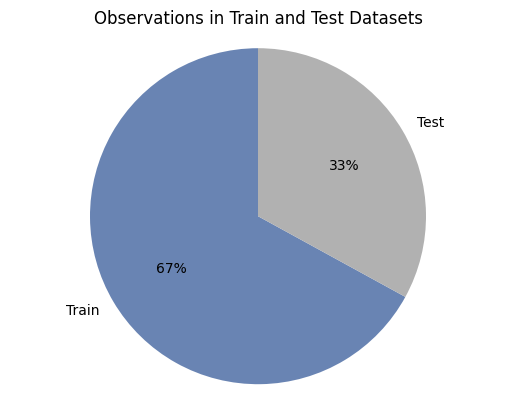

In [4]:
# Number of observations in train and test datasets
train_count = train.shape[0]
test_count = test.shape[0]

# Data for the pie chart
labels = ['Train', 'Test']
sizes = [train_count, test_count]
colors = ['#6984B3', '#B1B1B1']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90)

# Add a title
plt.title('Observations in Train and Test Datasets')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [5]:
print('Numeric columns','\n')
print("=======================")
print('\n')
print("\033[1mArray of numerical columns\033[0m")
display(train.describe().columns)
print("-----------------------")
print('\n')
print("\033[1mContent and data type\033[0m")
display(train.info())
print("-----------------------")
print('\n')
print("\033[1mDescriptive statistics\033[0m")
display(train.describe())

Numeric columns 



Array of numerical columns


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

-----------------------


Content and data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

-----------------------


Descriptive statistics


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<div class="alert alert-success">
<b>Inference:</b>

1. All numerical variables belong tot the ```money spent on the luxuries offered``` at the titanic spaceship, along with age of the passengers on board
2. The ```spread of the numerical data``` is wide ranged suggesting suggesting further investigations as mean loses significance with a large difference in values, leading to inconclusive trend understanding
</div>

In [6]:
num_df = train.select_dtypes('number')
print('Slice of dataframe with numeric columns')
display(num_df.head(5))
print('\n')
cat_df = train.select_dtypes(include=['object','boolean'])
print('Slice of dataframe with categorical columns')
display(cat_df.head(5))
print('\n')

Slice of dataframe with numeric columns


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0




Slice of dataframe with categorical columns


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True


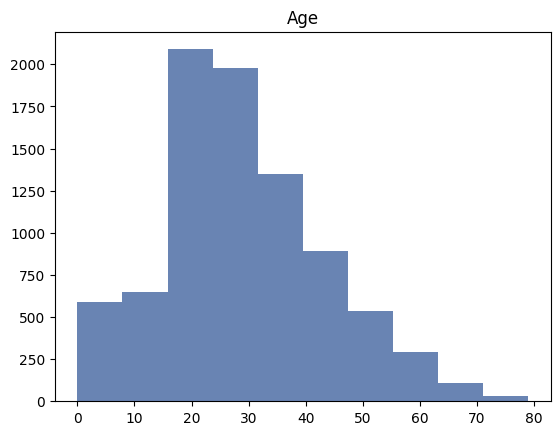

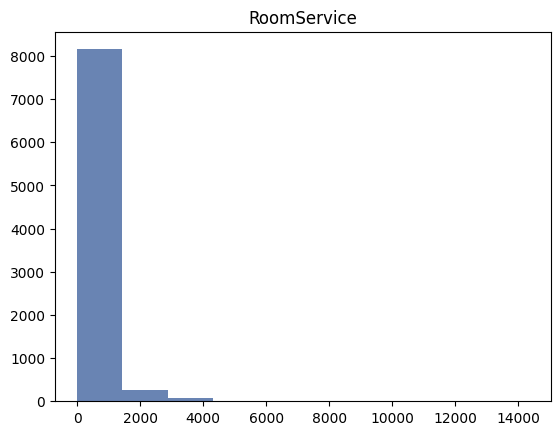

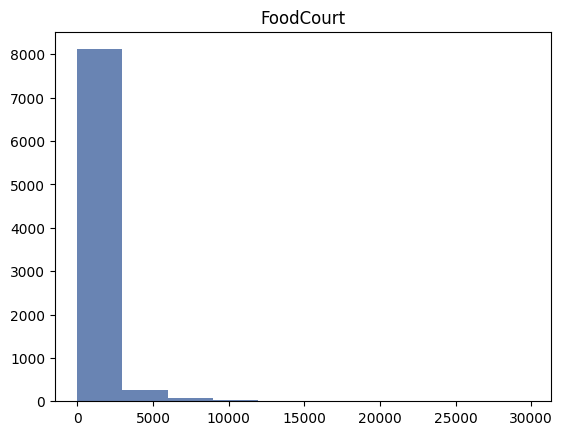

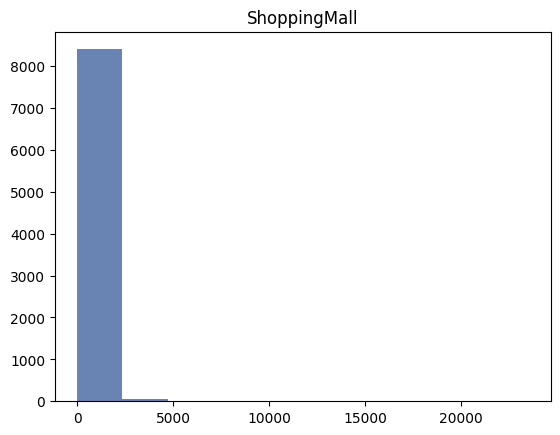

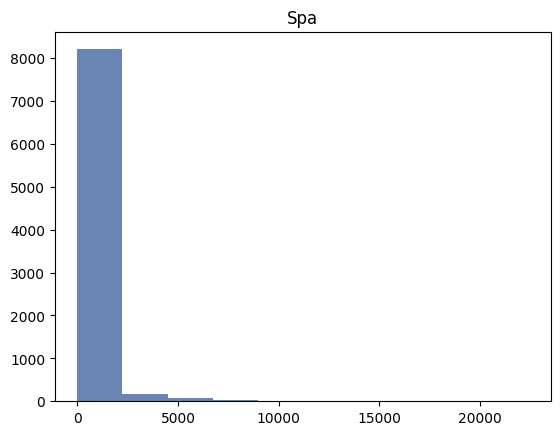

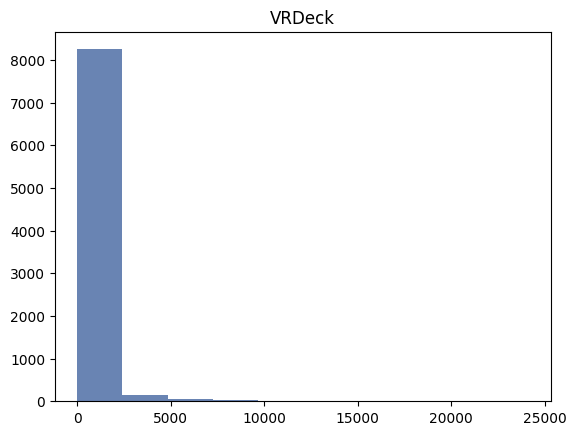

Text(0.5, 1.0, 'Correlation Heatmap')

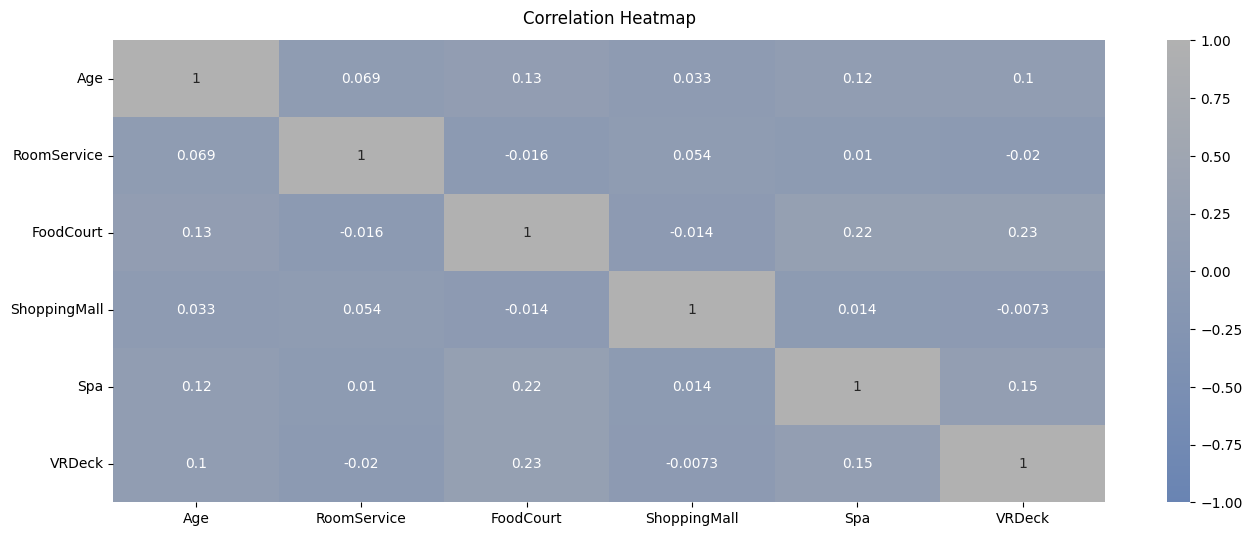

In [7]:
# Define the custom color
custom_color = mcolors.LinearSegmentedColormap.from_list('custom_color', colors)

# Numeric columns distributions
for i in num_df:
    plt.hist(num_df[i], bins=10, range=[num_df[i].min(), num_df[i].max()], color=colors[0])
    plt.title(i)
    plt.show()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(num_df.corr(), vmin=-1, vmax=1, annot=True, cmap=custom_color)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

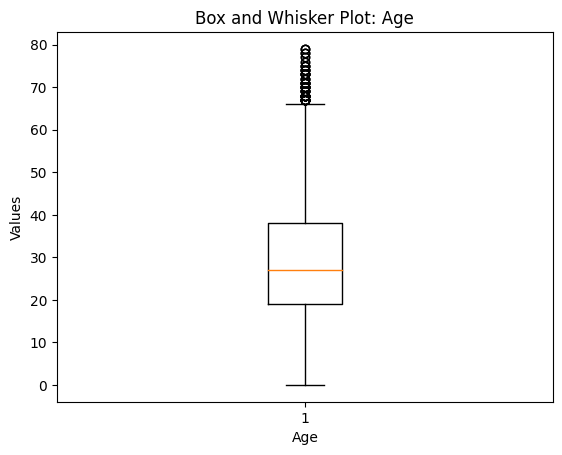

In [8]:
# Box and Whisker Plot for 'Age' column
age_data = train['Age'].dropna()

plt.boxplot(age_data)
plt.title('Box and Whisker Plot: Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

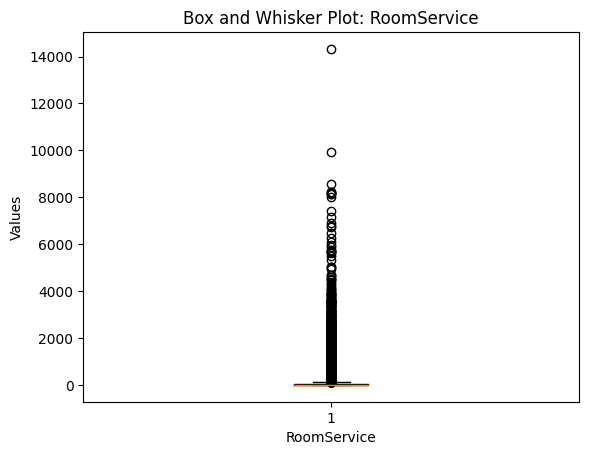

In [9]:
#  Box and Whisker Plot for 'RoomService' column
roomservice_data = train['RoomService'].dropna()
plt.boxplot(roomservice_data)
plt.title('Box and Whisker Plot: RoomService')
plt.xlabel('RoomService')
plt.ylabel('Values')
plt.show()

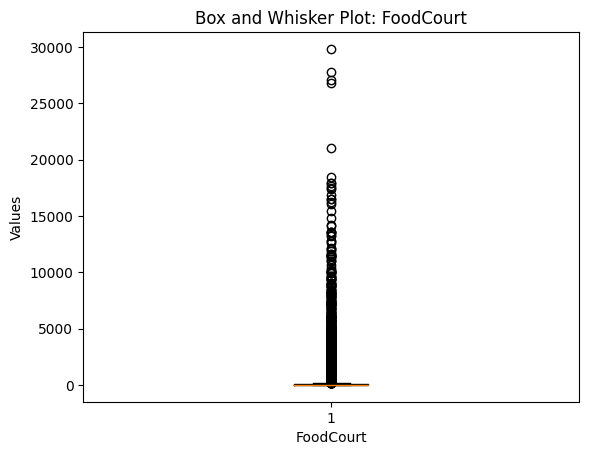

In [10]:
# Box and Whisker Plot for 'FoodCourt' column
foodcourt_data = train['FoodCourt'].dropna()
plt.boxplot(foodcourt_data)
plt.title('Box and Whisker Plot: FoodCourt')
plt.xlabel('FoodCourt')
plt.ylabel('Values')
plt.show()

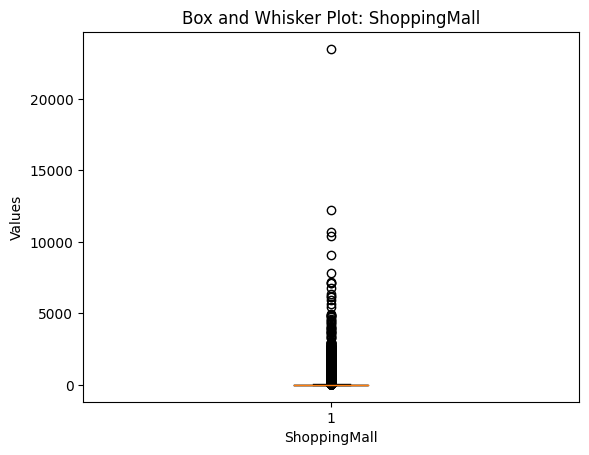

In [11]:
# Box and Whisker Plot for 'ShoppingMall' column
shoppingmall_data = train['ShoppingMall'].dropna()
plt.boxplot(shoppingmall_data)
plt.title('Box and Whisker Plot: ShoppingMall')
plt.xlabel('ShoppingMall')
plt.ylabel('Values')
plt.show()

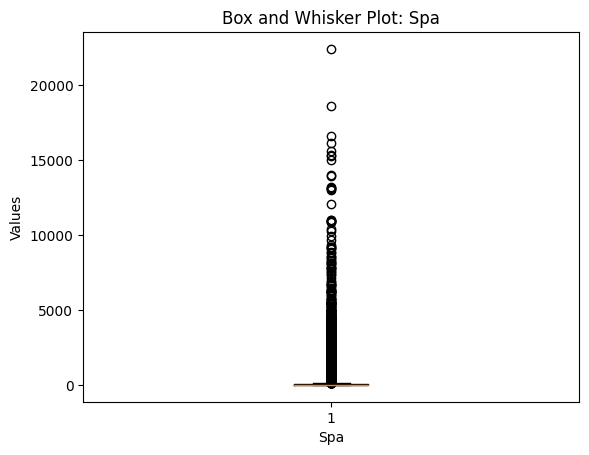

In [12]:
# Box and Whisker Plot for 'Spa' column
spa_data = train['Spa'].dropna()
plt.boxplot(spa_data)
plt.title('Box and Whisker Plot: Spa')
plt.xlabel('Spa')
plt.ylabel('Values')
plt.show()

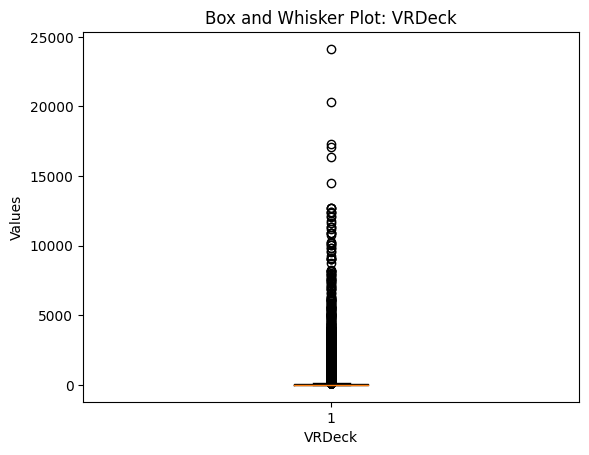

In [13]:
# Box and Whisker Plot for 'VRDeck' column
vrdeck_data = train['VRDeck'].dropna()
plt.boxplot(vrdeck_data)
plt.title('Box and Whisker Plot: VRDeck')
plt.xlabel('VRDeck')
plt.ylabel('Values')
plt.show()

<div class="alert alert-success">
<b>Chart Inference:</b>

1. ```Age``` follows normal distribution. We see majority adults between 20 to 30, suggesting this group which is younger and has a higher procilivity to taking risks, are comfortable travelling in space. We also see a spike in ages of children
2. Older people are more prone to ordering ```room service```
3. Passengers who spend money on ```VRDeck``` at less likely to spend money on ```room service``` or ```shopping mall```
4. Passengers who spend money on ```food court``` are less likely to order ```room service```
</div>

In [14]:
# Comparing transported rate with numerical variables
values = list(num_df.columns)
pivot_table = pd.pivot_table(train, index='Transported', values=values, aggfunc='mean')
display(pivot_table)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


<div class="alert alert-success">
<b>While no causal effect is implied, the general trend says on average...</b>

Passengers who got transported on average spent less on spa, VRDeck and room service, which could indicate that passengers who were busy with  ```indoor activities``` were more likely to be subjected to interdimensional transport v/s others.

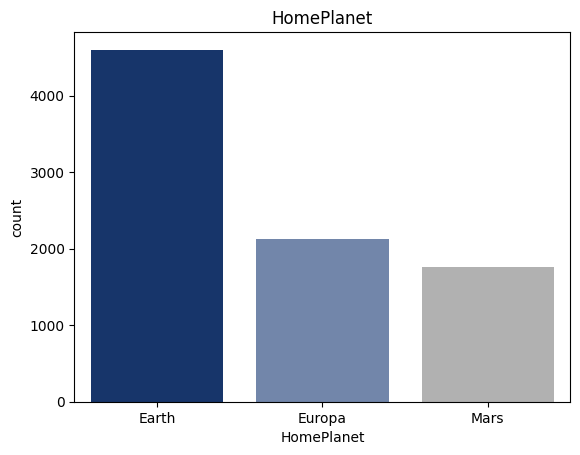

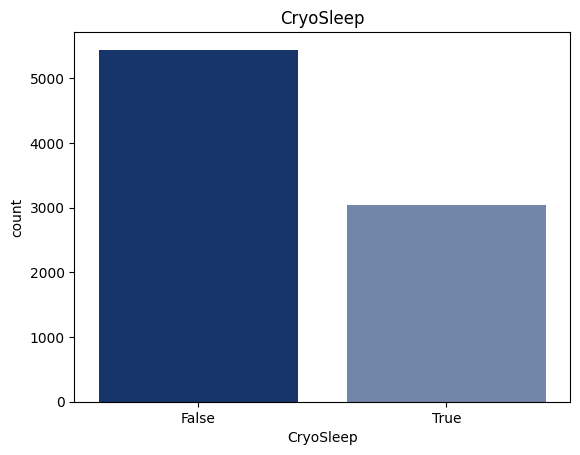

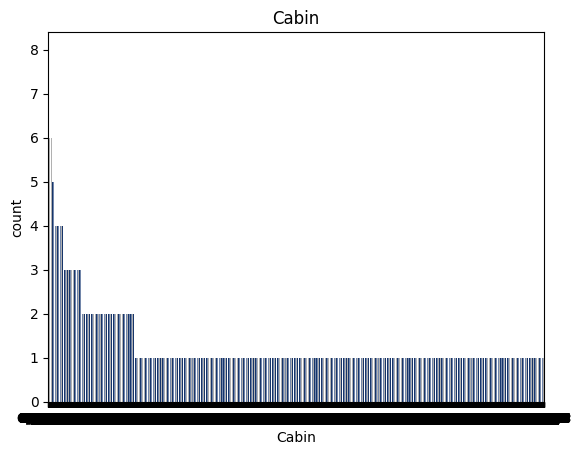

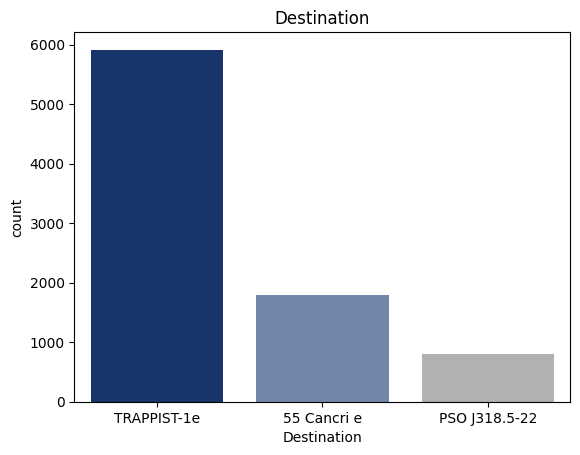

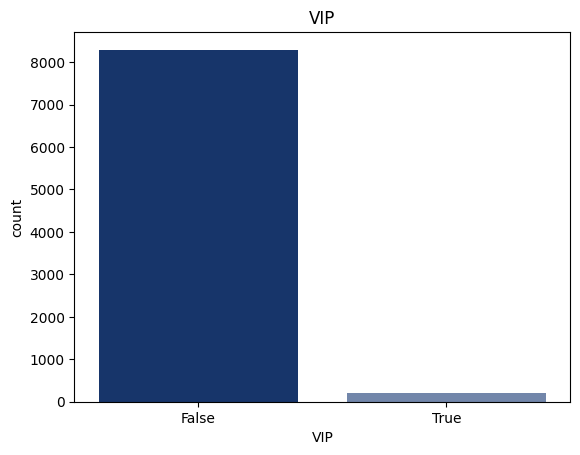

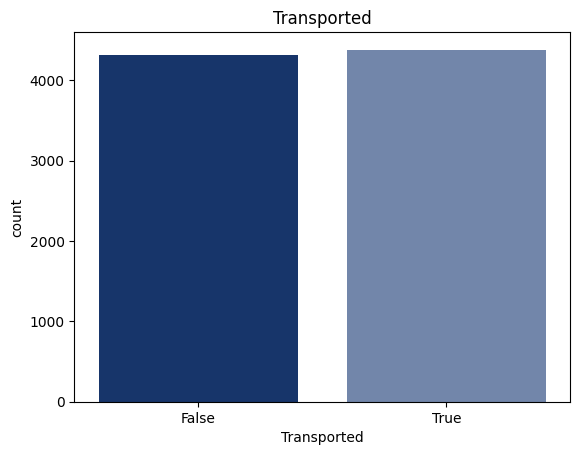

In [15]:
colors = ['#093178', '#6984B3', '#B1B1B1']
for column in cat_df.columns:
    if column != 'PassengerId' and column != 'Name':
        sns.barplot(x=cat_df[column].value_counts().index, y=cat_df[column].value_counts(), palette=colors)
        plt.title(column)
        plt.show()

<div class="alert alert-success">
<b>Inference:</b>

1. Most passengers travelled from ```earth```
2. Majority were going to ```TRAPPIST-1e```
3. Comparatively few were ```VIP```
4. Slightly more number of passengers preferred to not be put in ```CryoSleep```
</div>

In [16]:
# Similar to previous columns, we would like to look at the categorical column relation with 'Transported'
for column in cat_df.columns:
    if column != 'Transported' and column != 'Name' and column != 'Cabin' and column!= 'PassengerId':
        pivot_table = pd.pivot_table(train, index=column, values = 'Cabin',columns='Transported', aggfunc='count',margins=True)
        display(pivot_table)
        print('\n')

Transported,False,True,All
HomePlanet,,,
Earth,2594,1913,4507
Europa,706,1364,2070
Mars,820,902,1722
All,4120,4179,8299


Transported,False,True,All
CryoSleep,,,
False,3571,1760,5331
True,537,2416,2953
All,4108,4176,8284


Transported,False,True,All
Destination,,,
55 Cancri e,684,1066,1750
PSO J318.5-22,382,396,778
TRAPPIST-1e,3063,2725,5788
All,4129,4187,8316


Transported,False,True,All
VIP,,,
False,4003,4101,8104
True,118,75,193
All,4121,4176,8297


<div class="alert alert-success">
<b>Inference:</b>

1. Of the passengers travelling from ```Europa```, almost double the passengers were transported, posing a likely curiosity in the mechanics of Europa's geological system, making them prone to interdimensional transport
2. Of the few ```VIPs``` onboard, less than 3/4ths of them were prone to interdimensional travel. The number though no significant is reasonable considering there could be extra security measures in place
3. And those who opted for ```CryoSleep``` were 4 times more likely to be Transported v/s those who weren't
</div>

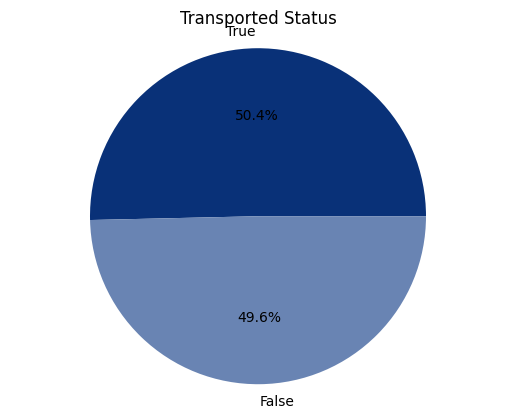

In [17]:
# Pie chart of distribution of the target label
transported_counts = train['Transported'].value_counts()

plt.pie(transported_counts, labels=transported_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Transported Status')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

<div class="alert alert-success">
<b>Inference:</b>

This is a case of balanced data where the predictors are of equal distribution among 0 and 1. 
</div>

In [18]:
print("\033[1mNumber of empty cells by columns in train set\033[0m")
display(train.isna().sum().sort_values(ascending=False))

Number of empty cells by columns in train set


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [19]:
print("\033[1mNumber of empty cells by columns in test set\033[0m")
display(test.isna().sum().sort_values(ascending=False))

Number of empty cells by columns in test set


FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

<div class="alert alert-success">
<b>Inference:</b>

All columns have missing values, except identifier,  ```PassengerId```, and target label ```Transported```
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Data Cleaning</h1>
</div>

In [20]:
# We have to change the values in "Transported" from True and False to 0,1. 
# Some models will require binary integers instead of boolean values.
train['Transported'] = train['Transported'].astype(int)
print(train["Transported"])

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Feature Engineering possibilities</h1>
    <h2><i>Column - Cabin</i></h2>
</div>

In [21]:
print('Number of empty cells in the column cabin')
print(train.Cabin.isna().sum())
print('\n')
print('Unique values in the column cabin')
display(train.Cabin.value_counts())
print('\n')
print('Number of unique values in the column cabin')
display(train.Cabin.nunique())

Number of empty cells in the column cabin
199


Unique values in the column cabin


Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64



Number of unique values in the column cabin


6560

<div class="alert alert-success">
<b>Steps:</b>

1. The histogram for ```cabin```, appears to be cluttered, further investigations suggests the breakup of cabin into ```Deck Level```, ```Cabin Number``` and ```Area``` (Starboard or Port)
2.The assumption lies that number booked, deck and side suggest patterns in the feature cabin, hence worth investigating ```trend``` with respect to Transported
</div>

In [22]:
# Lets divide the cabin into Deck Level, Cabin Number and Area (Starboard or Port)
def extract_cabin_info(df):
    df['Deck Level'] = df['Cabin'].str.extract(r'([A-Za-z]+)')
    df['Cabin Number'] = df['Cabin'].str.extract(r'(\d+)')
    df['Starboard/Port'] = df['Cabin'].str.extract(r'([A-Za-z]$)')
    
    df.drop('Cabin', axis=1, inplace=True)

extract_cabin_info(train)
extract_cabin_info(test)

train['Cabin Number'] = pd.to_numeric(train['Cabin Number'], errors='coerce')
test['Cabin Number'] = pd.to_numeric(test['Cabin Number'], errors='coerce')

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Feature Engineering possibilities</h1>
    <h2><i>Column - PassengerId</i></h2>
</div>

In [23]:
# Lets extract the passenger number and the group of each passenger
def extract_passenger_id_info(df):
    df['Passenger_Num'] = df['PassengerId'].str[:4]
    df['Passenger_Group'] = df['PassengerId'].str.split('_').str[1]
    df.drop("PassengerId", axis=1, inplace=True)

extract_passenger_id_info(train)
extract_passenger_id_info(test)

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Pipeline and model</h1>
    <h2><i>Train-test split</i></h2>
</div>

In [24]:
from sklearn.model_selection import train_test_split

X = train.drop("Transported", axis=1)
y = train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i>Separating Numerical and Categorical Features for the Pipeline</i></h2>
</div>

In [25]:
numerical_columns = X.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i>Now we create a simple model and fit transform using the pipeline</i></h2>
</div>

In [26]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

imputer_median = SimpleImputer(strategy='median')
knn = KNNImputer()

numerical_pipeline = Pipeline([
    ('imputer_median', imputer_median),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


pipeline.fit(X_train, y_train)


y_pred_test = pipeline.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.80448533640023


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Feature Engineering and Testing FE performance</h1>
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i>Lets do a sum of all spending per passenger</i></h2>
    <h3>We only include those columns that show spending habits within the spaceship as per data documentation in Kaggle</h3>
</div>

In [27]:
def calculate_total(df):
    df['Spending_in_Room'] = df[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)
    df['Spending_in_Ship'] = df[['FoodCourt', 'ShoppingMall']].sum(axis=1)
    df['in_spenders'] = df['Spending_in_Room'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else None))
    df['out_spenders'] = df['Spending_in_Ship'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else None))
    return df

calculate_total(train)
calculate_total(test)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck Level,Cabin Number,Starboard/Port,Passenger_Num,Passenger_Group,Spending_in_Room,Spending_in_Ship,in_spenders,out_spenders
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,0013,01,0.0,0.0,0,0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,0018,01,2823.0,9.0,1,1
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,0019,01,0.0,0.0,0,0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,0021,01,766.0,6652.0,1,1
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,0023,01,10.0,635.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496.0,S,9266,02,0.0,0.0,0,0
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,9269,01,154.0,864.0,1,1
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296.0,P,9271,01,0.0,0.0,0,0
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297.0,P,9273,01,523.0,2680.0,1,1


In [28]:
X_1 = train.drop("Transported", axis=1)
y_1 = train['Transported']


X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

numerical_columns = X_1.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns = X_1.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.79700977573318


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i> We will now try some bootstrapping</i></h2>
</div>

In [29]:
bootstrapped_train = train.sample(frac=1.2, replace=True, random_state=42)

In [30]:
X_2 = bootstrapped_train.drop("Transported", axis=1)
y_2 = bootstrapped_train['Transported']


X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

numerical_columns = X_2.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns = X_2.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.8902731193100144


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>Testing Feature Engineering performance</h1>
</div>

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import catboost as cb
from sklearn.model_selection import StratifiedKFold, cross_val_score,RandomizedSearchCV
from scipy.stats import randint, uniform

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i> Final XGBoost model before checking other models </i></h2>
</div>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

numerical_columns = X_2.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns = X_2.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.8902731193100144


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i> Trying a set of other models </i></h2>
</div>

In [33]:
catboost_model = cb.CatBoostClassifier(loss_function='Logloss',verbose=False)
model1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', catboost_model)
])

xgb_model = xgb.XGBClassifier()
model2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


decision_tree_model = DecisionTreeClassifier()
model3 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree_model)
])


random_forest_model = RandomForestClassifier()
model4 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest_model)
])


svm_model = SVC()
model5 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm_model)
])


gradient_boosting_model = GradientBoostingClassifier()
model6 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gradient_boosting_model)
])


models = [model1, model2, model3, model4, model5, model6]


for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Model", i+1, "Test Accuracy:", accuracy_test)

Model 1 Test Accuracy: 0.836607570675611
Model 2 Test Accuracy: 0.8902731193100144
Model 3 Test Accuracy: 0.9113560134163872
Model 4 Test Accuracy: 0.9195016770483948
Model 5 Test Accuracy: 0.832774317201725
Model 6 Test Accuracy: 0.8001916626736943


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1> XGBoost optimizing with randomized search cv </h1>
</div>

- Everything is frozen to avoid re-running due to long computational time.

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i> Re-defining the Pipeline </i></h2>
</div>

In [34]:
numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

xgb_model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i> Final XGBoost model </i></h2>
</div>

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifier = xgb.XGBClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


param_dist = {
    'classifier__n_estimators': randint(30, 200),
    'classifier__max_depth': randint(2, 8),
    'classifier__learning_rate': uniform(0.001, 0.1),
    'classifier__min_child_weight': randint(1, 10),
    'classifier__subsample': uniform(0.7, 0.3),
    'classifier__gamma': uniform(0, 0.3),
    'classifier__colsample_bytree': uniform(0.7, 0.3)
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=stratified_kfold, scoring='accuracy', n_iter=200, random_state=42,n_jobs=12)


random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_
best_params = random_search.best_params_


print("Best Parameters:", best_params)


y_pred_test = best_model.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (Tuned Model):", accuracy_test)


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1> CatBoost optimizing </h1>
</div>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform
import catboost as cb


catboost = cb.CatBoostClassifier(loss_function='Logloss', verbose=False)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', catboost)
])


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


param_dist = {
    'classifier__iterations': randint(80, 200),
    'classifier__depth': randint(1, 8),
    'classifier__learning_rate': uniform(0.001, 0.1),
    'classifier__l2_leaf_reg': uniform(1, 20),
    'classifier__border_count': randint(1, 500),
    'classifier__bagging_temperature': uniform(0, 1),
    'classifier__loss_function': ['Logloss', 'CrossEntropy']
}


catboost_model = cb.CatBoostClassifier(loss_function='Logloss', verbose=False)


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', catboost_model)
])


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=stratified_kfold, scoring='accuracy', n_iter=100, random_state=42, n_jobs=12)


random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_
best_params = random_search.best_params_


print("Best Parameters:", best_params)


y_pred_test = best_model.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (Tuned Model):", accuracy_test)

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2><i> Trying to find the optimal bootstrapping sample size </i></h2>
</div>

- As we increase the sample size, we might run into overfitting.

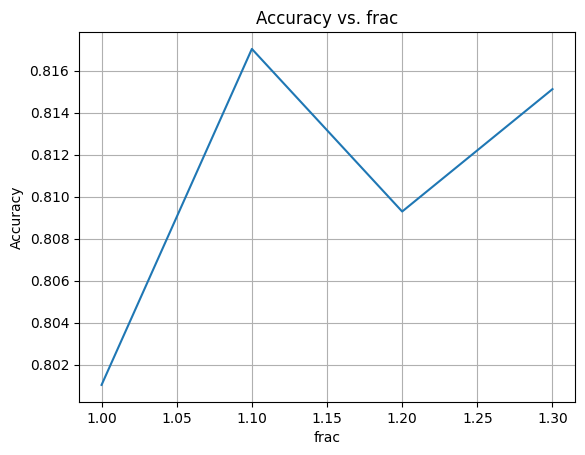

In [40]:
import catboost as cb

frac_values = [round(x, 1) for x in np.arange(1.0, 1.3, 0.02)]

accuracy_scores = []

for frac in frac_values:
    bootstrapped_train = train.sample(frac=frac, replace=True, random_state=42)

    X_2 = bootstrapped_train.drop("Transported", axis=1)
    y_2 = bootstrapped_train['Transported']
    X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
    
    numerical_columns = X_2.select_dtypes(include=['int','float']).columns.tolist()
    categorical_columns = X_2.select_dtypes(include=['object']).columns.tolist()

    numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
    ])


    # Best parameters obtained from RandomizedSearchCV
    best_parameters = {
    'bagging_temperature': 0.8389335020693633,
    'border_count': 58,
    'depth': 6,
    'iterations': 128,
    'l2_leaf_reg': 1.7469637749842883,
    'learning_rate': 0.08326005606596583
    }
    
    catboost_best = cb.CatBoostClassifier(loss_function='Logloss', verbose=False, **best_parameters)

    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', catboost_best)
    ])

    pipeline.fit(X_train, y_train)

    
    y_pred_test = pipeline.predict(X_test)

    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    
    accuracy_scores.append(accuracy_test)

plt.plot(frac_values, accuracy_scores)
plt.xlabel('frac')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. frac')
plt.grid(True)
plt.show()

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1> Running the best model </h1>
<p><b>
- CatBoost
Bootstrapping fraction set to (all percentages are accuracy):

- 1.1: 80.5%
- 1.2: 80.664%
- 1.5: 80.0%
- 1.6: 80.243%
- 1.7: 80.5%
- 1.8: 80.1%
- 1.9: 80.1%
- 2.0: 80.664% 
- 2.1: 80.224%
- Important to mention the diminishing returns of bootstrapping, it gave us a slight boost but above 1.2, we just observe overfitting.
    </b></p>
</div>

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2> Running the best CatBoost model </h2>

</div>

In [36]:
bootstrapped_train = train.sample(frac=1.2, replace=True, random_state=42)

X_2 = bootstrapped_train.drop("Transported", axis=1)
y_2 = bootstrapped_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42)

numerical_columns = X_2.select_dtypes(
    include=['int', 'float']).columns.tolist()
categorical_columns = X_2.select_dtypes(
    include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

best_parameters_catboost = {
    'bagging_temperature': 0.8389335020693633,
    'border_count': 58,
    'depth': 6,
    'iterations': 128,
    'l2_leaf_reg': 1.7469637749842883,
    'learning_rate': 0.08326005606596583
}

catboost_best = cb.CatBoostClassifier(
    loss_function='Logloss', verbose=False, **best_parameters_catboost)

pipeline_cat = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', catboost_best)
])

# Perform Stratified 10-fold Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline_cat, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean Cross-validation score:", cv_scores.mean())

# Fit and predict as before
pipeline_cat.fit(X_train, y_train)
y_pred_test = pipeline_cat.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (Tuned Model):", accuracy_test)

Cross-validation scores: [0.83353293 0.80359281 0.80598802 0.78443114 0.7988024  0.81055156
 0.81654676 0.81294964 0.8117506  0.83213429]
Mean Cross-validation score: 0.8110280159106248
Test Accuracy (Tuned Model): 0.8092956396741735


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2> Checking for overfitting in our CatBoost Model </h2>
</div>

In [37]:
# Fit and predict as before
pipeline_cat.fit(X_train, y_train)
y_pred_train = pipeline_cat.predict(X_train)

# Train accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy (Tuned Model):", accuracy_train)

# Cross-Validation score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline_cat, X_train, y_train, cv=cv, scoring='accuracy')
print("Mean Cross-validation score:", cv_scores.mean())

# Test accuracy
y_pred_test = pipeline_cat.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (Tuned Model):", accuracy_test)

Train Accuracy (Tuned Model): 0.8310365488316357
Mean Cross-validation score: 0.8110280159106248
Test Accuracy (Tuned Model): 0.8092956396741735


These results show that our model doesnt suffer from overfitting.

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2> Running the best XgBoost Model </h2>
</div>

This model is most probably extremely overfitted.

In [38]:
best_parameters_xgboost: {'classifier__colsample_bytree': 0.7233203910894954, 'classifier__gamma': 0.29231844229984993, 'classifier__learning_rate': 0.0996210744479603,
                          'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 190, 'classifier__subsample': 0.8233620162616558}

bootstrapped_train = train.sample(frac=1.2, replace=True, random_state=42)

X_2 = bootstrapped_train.drop("Transported", axis=1)
y_2 = bootstrapped_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42)

numerical_columns = X_2.select_dtypes(
    include=['int', 'float']).columns.tolist()
categorical_columns = X_2.select_dtypes(
    include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer_most_frequent', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

best_parameters_xgboost: {
'classifier__colsample_bytree': 0.7233203910894954, 'classifier__gamma': 0.29231844229984993,
'classifier__learning_rate': 0.0996210744479603,
'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 
'classifier__n_estimators': 190, 'classifier__subsample': 0.8233620162616558}


classifier = xgb.XGBClassifier()

pipeline_xg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Perform Stratified 10-fold Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline_xg, X_train, y_train, cv=cv, scoring='accuracy')
print("Mean Cross-validation score:", cv_scores.mean())

# Fit and predict as before
pipeline_xg.fit(X_train, y_train)
y_pred_test = pipeline_xg.predict(X_test)

Mean Cross-validation score: 0.881849107540315


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h2> Checking for overfitting in our CatBoost Model </h2>
</div>

In [39]:
# Fit and predict as before
pipeline_xg.fit(X_train, y_train)
y_pred_train = pipeline_xg.predict(X_train)

# Train accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy (Tuned Model):", accuracy_train)

# Cross-Validation score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline_xg, X_train, y_train, cv=cv, scoring='accuracy')
print("Mean Cross-validation score:", cv_scores.mean())
# Test accuracy
y_pred_test = pipeline_xg.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy (Tuned Model):", accuracy_test)

Train Accuracy (Tuned Model): 0.9505092869982025
Mean Cross-validation score: 0.881849107540315
Test Accuracy (Tuned Model): 0.8902731193100144


<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1> We attempt to change thresholds to maximize accuracy </h1>
</div>

In [ ]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Define a range of threshold values to test
thresholds = np.linspace(0, 1, num=101)

# Initialize variables to store the best accuracy and corresponding threshold
best_accuracy = 0
best_threshold = 0

# Iterate over the thresholds and calculate accuracy
for threshold in thresholds:
    # Apply the threshold to convert probabilities to binary predictions
    y_pred_binary = (y_pred_prob >= threshold).astype(int)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Print the best threshold and corresponding accuracy
print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)

<div class="alert alert-info" style="background-color: #FFB380;color: white;border-radius: 10px;">
    <h1>  We chose CatBoost as our best model because it showed the least overfitting,n we then predict the test dataset with it and then save a new dataframe with passengerid (test dataframe) and the predicted result for the target label </h1>
</div>

In [ ]:
y_pred_test = best_model.predict(test)
print(y_pred_test)

In [ ]:
y_pred_test = pipeline_cat.predict(test)
y_pred_test

In [ ]:
predictions = pd.DataFrame({'PassengerId': test['Passenger_Num'] + '_' + test['Passenger_Group'],
                            'Transported': y_pred_test})

predictions['Transported'] = predictions['Transported'].astype(bool)
predictions

In [ ]:
predictions.to_csv('prediction_catboost_1.2.csv', index=False)